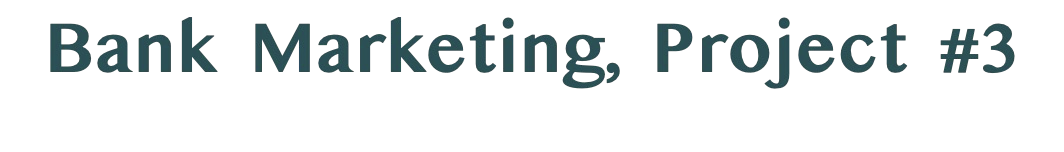

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.gridspec as gridspec
#import seaborn_image as isns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,classification_report
import warnings
import random
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
import time
import seaborn as sns
import seaborn
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')


*  `age ` - age of the costumer (numeric)

*  `job` type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

*  `marital ` marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* `education ` - (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

* `default` - has credit in default? (categorical: 'no','yes','unknown')

* `housing ` has housing loan? (categorical: 'no','yes','unknown')

* `loan` - has personal loan? (categorical: 'no','yes','unknown')


* `contact` - contact communication type (categorical: 'cellular','telephone')

* `month` -last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

* `day_of_week ` -last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

* `duration ` last contact duration, in seconds (numeric). Important note: this attribute highly affects the output 

   target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after      the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and          should be discarded if the intention is to have a realistic predictive model.

* `campaign` -number of contacts performed during this campaign and for this client (numeric, includes last contact)

* `pdays: ` - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* `previous ` -number of contacts performed before this campaign and for this client (numeric)

* `poutcome ` - outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

* `emp.var.rate ` - employment variation rate - quarterly indicator (numeric)

* `cons.price.idx ` - consumer price index - monthly indicator (numeric)

* `cons.conf.idx ` - consumer confidence index - monthly indicator (numeric)

* `uribor3m ` -  euribor 3 month rate - daily indicator (numeric)

* `nr.employed `- number of employees - quarterly indicator (numeric)

*  `subscribed `- has the client subscribed a term deposit? (binary: 'yes','no')

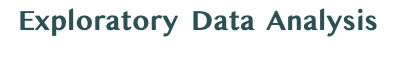

In [2]:
# Upload the data and view it

df_bank = pd.read_excel('bank.xlsx')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_bank = df_bank.rename({'y': 'subscribed'}, axis=1)  # new method

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Check shape
df_bank.shape

(41188, 21)

In [6]:
# Check columns
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

### Checking for Null Values

In [7]:
# Using isnull method and sum it up
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

### Checking if the data is  balanced  

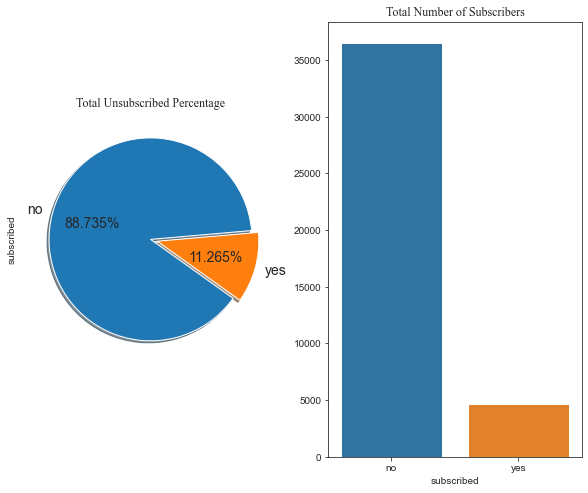

In [8]:
# Data to plot

sns.set_style("ticks")

fig, ax = plt.subplots(1,2,figsize=(10,8))

df_bank['subscribed'].value_counts().plot.pie(explode=[0,0.07], ax=ax[0], autopct='%1.3f%%',
                                              shadow=True, fontsize=14, startangle=5)

ax[0].set_title('Total Unsubscribed Percentage', fontname='Times New Roman')

sns.countplot('subscribed', data=df_bank, ax=ax[1])

ax[1].set_title('Total Number of Subscribers', fontname='Times New Roman')
ax[1].set_ylabel('')

plt.show()

In [9]:
#Distribution of data type
print("Data types and their frequency\n{}".format(df_bank.dtypes.value_counts()))

Data types and their frequency
object     11
float64     5
int64       5
dtype: int64


In [10]:
# Check balance of target data 
df_bank['subscribed'].value_counts()

no     36548
yes     4640
Name: subscribed, dtype: int64

In [11]:
df_bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
subscribed           2
dtype: int64

In [12]:
# Continiuous Variables

In [13]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
df_bank['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [15]:

# I will remove 56 in the bedrooms column given that it is an outlier. I will use the idxmax() method  

# df_bank['campaign'] = df_bank['campaign'].drop(df_bank['campaign'].idxmax(2))
# df_bank.describe()

### Correlation

In [16]:
numerical_var = [feature for feature in df_bank.columns if ((df_bank[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of continuous variables: ', len(numerical_var))

# visualise the numerical variables
df_bank_num = df_bank[numerical_var].head()


df_bank_num


Number of continuous variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


<function matplotlib.pyplot.show(close=None, block=None)>

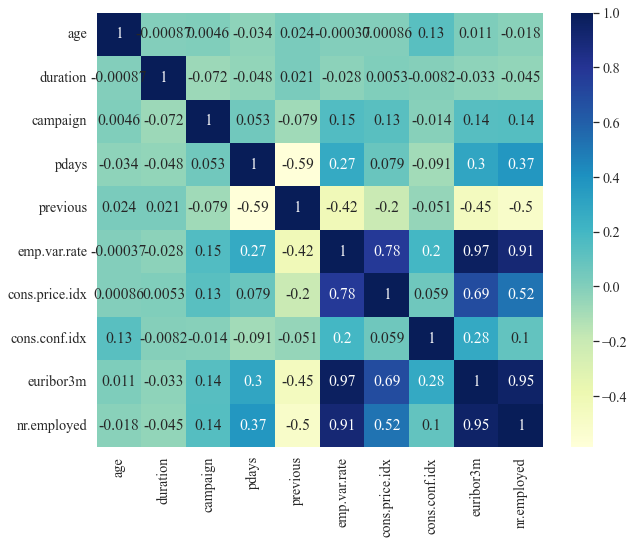

In [17]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='Times New Roman', 
              font_scale= 1.3, color_codes=True, rc=None)

plt.figure(figsize=(10,8))

sns.heatmap(df_bank.corr(),cmap='YlGnBu',annot=True)



plt.show

In [18]:
# nr.employes and euribor- calculated. 

In [19]:
# Select upper triangle of correlation matrix
corr_matrix = df_bank.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation value greater than 0.95 (i.e. features to be strongly dependent)
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
df_bank.drop(to_drop, axis=1, inplace=True)

In [20]:
to_drop

['euribor3m', 'nr.employed']

In [21]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,no


In [22]:
#what varaibles are correlated 
# matrix = df_bank.corr()
# matrix = matrix.unstack()
# matrix = matrix[abs(matrix) >= 0.6]
# matrix

In [23]:
# df_bank.drop(['emp.var.rate', 'euribor3m'], axis=1, inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

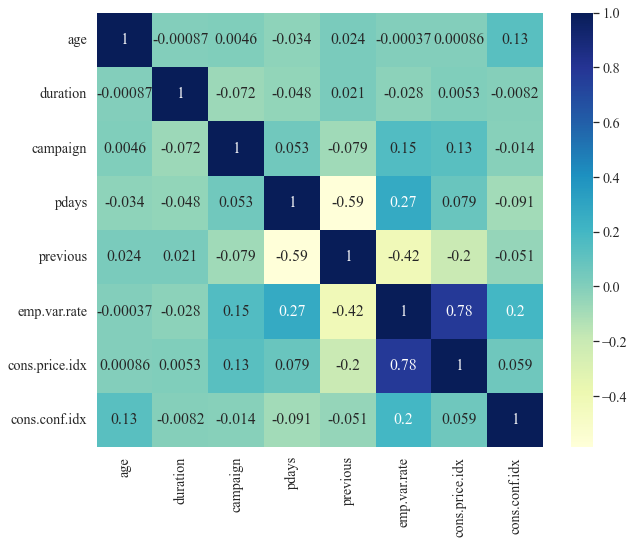

In [24]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='Times New Roman', 
              font_scale= 1.3, color_codes=True, rc=None)

plt.figure(figsize=(10,8))

sns.heatmap(df_bank.corr(),cmap='YlGnBu',annot=True)


plt.show

In [25]:
# matrix = df_bank.corr()
# matrix = matrix.unstack()# matrix = matrix[abs(matrix) >= 0.7]
# matrix

### Pairplot

In [26]:
# plt.figure(figsize=(50,40))
#sns.pairplot(df_bank, hue='subscribed')
#ax.legend()

### Histogram

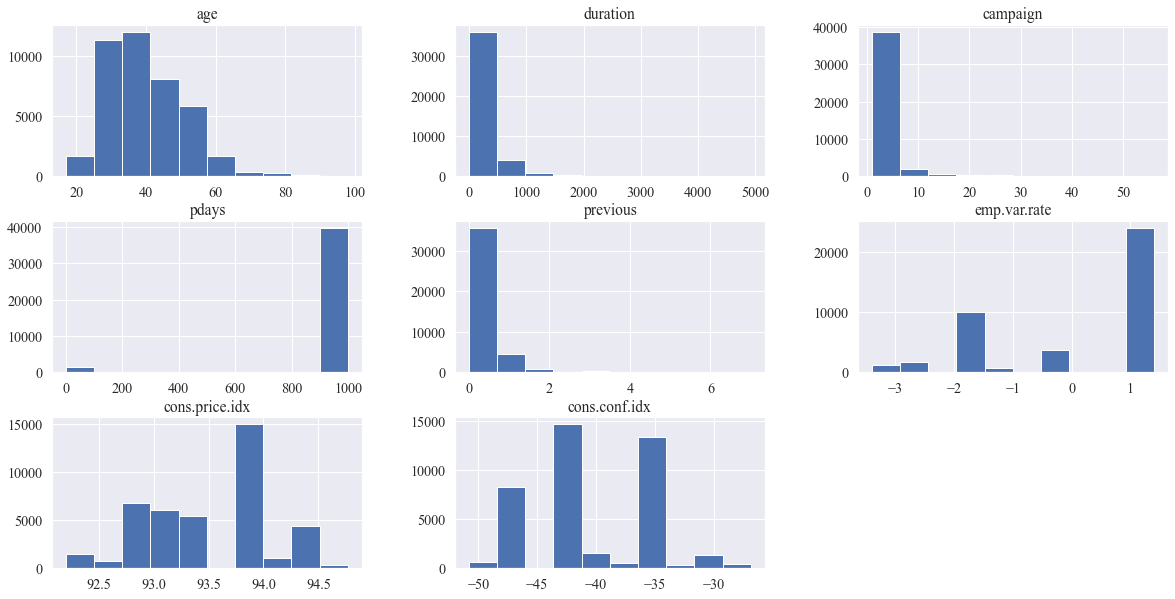

In [27]:
# Creating histogram
df_bank.hist(figsize= [20,10])
plt.show()

### Visualize Numerical Variables

In [28]:
numeric_data = df_bank._get_numeric_data()
numeric_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,56,261,1,999,0,1.1,93.994,-36.4
1,57,149,1,999,0,1.1,93.994,-36.4
2,37,226,1,999,0,1.1,93.994,-36.4
3,40,151,1,999,0,1.1,93.994,-36.4
4,56,307,1,999,0,1.1,93.994,-36.4


<Figure size 432x288 with 0 Axes>

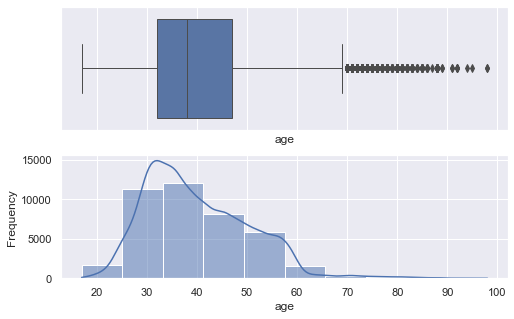

<Figure size 576x360 with 0 Axes>

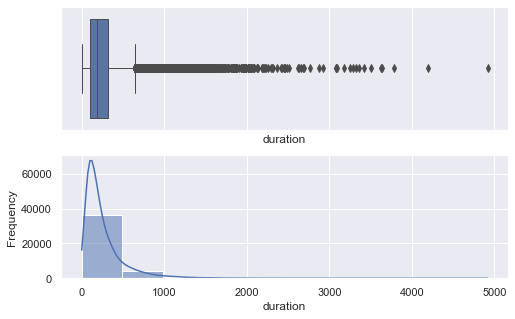

<Figure size 576x360 with 0 Axes>

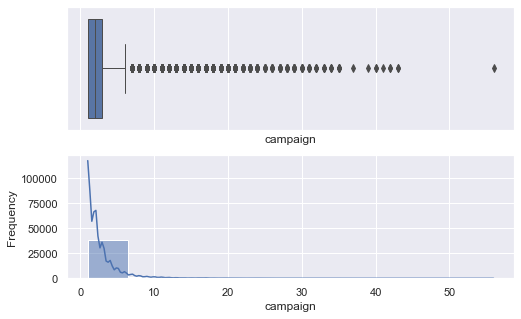

<Figure size 576x360 with 0 Axes>

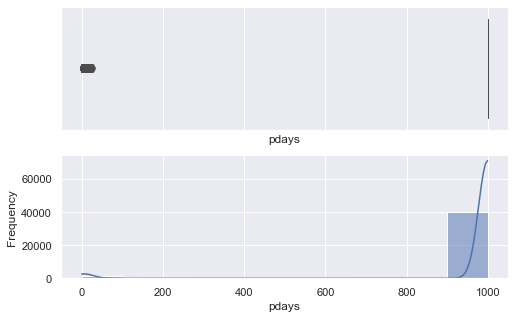

<Figure size 576x360 with 0 Axes>

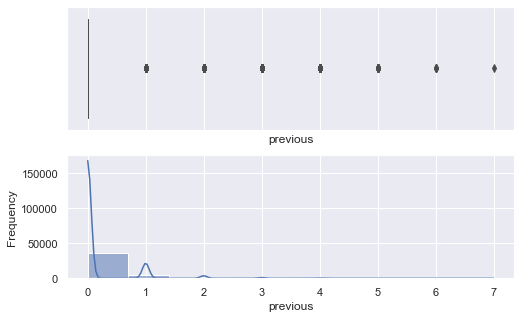

<Figure size 576x360 with 0 Axes>

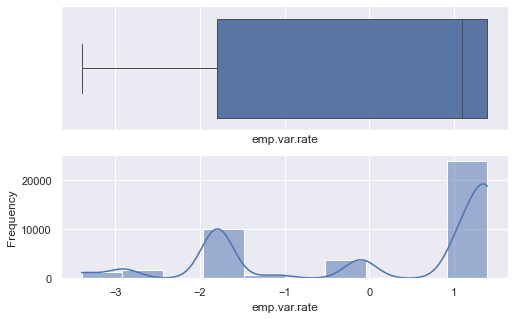

<Figure size 576x360 with 0 Axes>

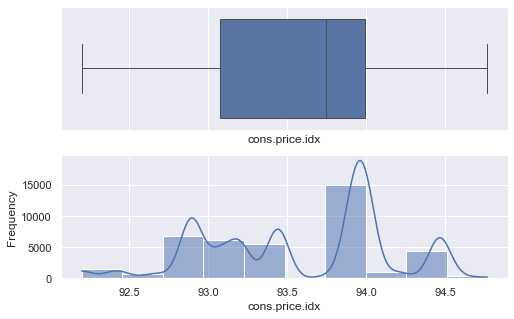

<Figure size 576x360 with 0 Axes>

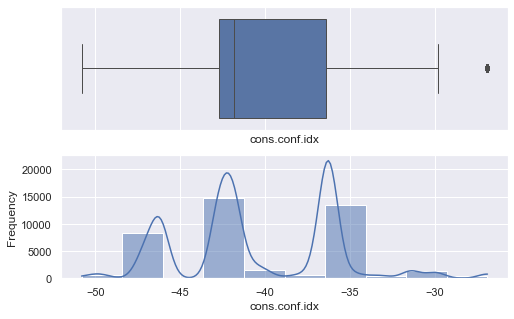

In [29]:
for i in numeric_data.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(numeric_data[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(numeric_data[i], ax=ax_hist , bins = 10,kde=True)

In [30]:
# rplacing '.' with underline as it will cause issues with the plotting. 


df_bank.columns = list(map(lambda x: x.replace('.', '_'),
                                 df_bank.columns))


Statistical Summary 


Subscribed
                 count        mean         std     min      25%    50%  \
age             4640.0   40.913147   13.837476  17.000   31.000   37.0   
duration        4640.0  553.191164  401.171871  37.000  253.000  449.0   
pdays           4640.0  792.035560  403.407181   0.000  999.000  999.0   
previous        4640.0    0.492672    0.860344   0.000    0.000    0.0   
cons_price_idx  4640.0   93.354386    0.676644  92.201   92.893   93.2   
cons_conf_idx   4640.0  -39.789784    6.139668 -50.800  -46.200  -40.4   

                    75%       max  
age              50.000    98.000  
duration        741.250  4199.000  
pdays           999.000   999.000  
previous          1.000     6.000  
cons_price_idx   93.918    94.767  
cons_conf_idx   -36.100   -26.900  


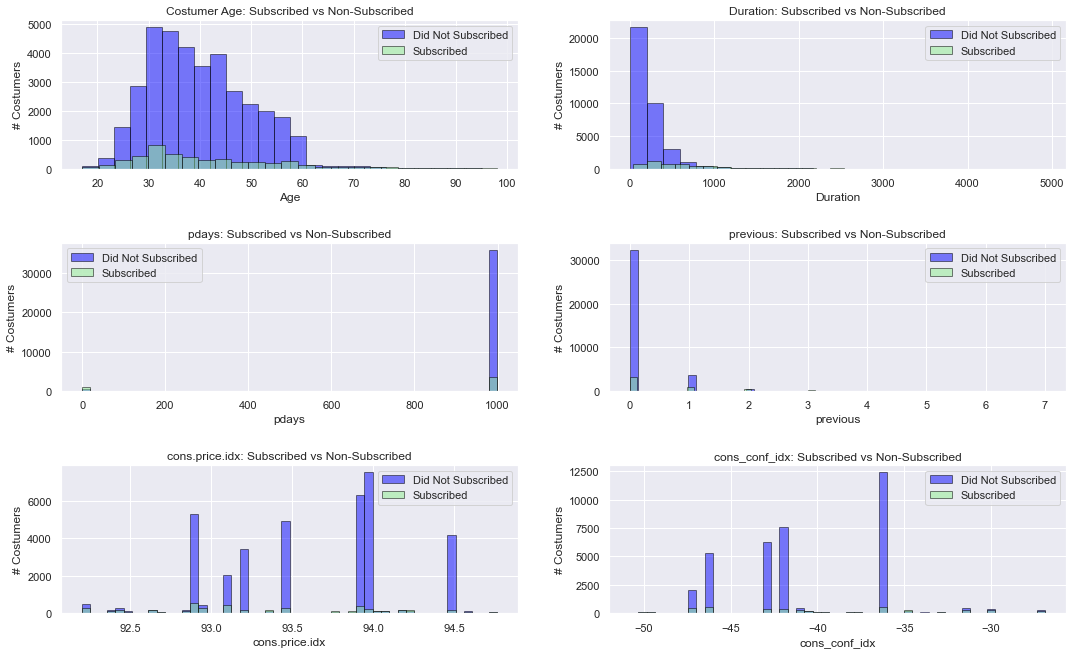

In [31]:
print('Statistical Summary ')
print('\n')
print('Subscribed')
print(df_bank[df_bank['subscribed']=='yes'][['age','duration','pdays','previous','cons_price_idx','cons_conf_idx']].describe().transpose())
# print('--'*40)
# print('')
# print(df_bank[df_bank['subscribed']=='no'][['age','duration','pdays','previous','cons_price_idx','cons_conf_idx']].describe().transpose())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (18,15))
fig.subplots_adjust(hspace = .50)


ax1 = fig.add_subplot(421)
ax1.hist(df_bank[df_bank['subscribed']=='no'].age, bins = 25, label ='Did Not Subscribed', alpha = .50,edgecolor= 'black',color ='blue')
ax1.hist(df_bank[df_bank['subscribed']=='yes'].age, bins = 25, label = 'Subscribed', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Costumer Age: Subscribed vs Non-Subscribed')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Costumers')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(422)
ax2.hist(df_bank[df_bank['subscribed']=='no'].duration, bins = 25, label = 'Did Not Subscribed', alpha = .50, edgecolor ='black', color = 'blue')
ax2.hist(df_bank[df_bank['subscribed']=='yes'].duration, bins = 25, label = 'Subscribed', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax2.set_title('Duration: Subscribed vs Non-Subscribed')
ax2.set_xlabel('Duration')
ax2.set_ylabel('# Costumers')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(423)


ax3.hist(df_bank[df_bank['subscribed']=='no'].pdays, bins = 50, label = 'Did Not Subscribed', alpha = .50, edgecolor ='black', color = 'blue')
ax3.hist(df_bank[df_bank['subscribed']=='yes'].pdays, bins = 50, label = 'Subscribed', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax3.set_title('pdays: Subscribed vs Non-Subscribed')
ax3.set_xlabel('pdays')
ax3.set_ylabel('# Costumers')
ax3.legend(loc = 'upper right')


ax4 = fig.add_subplot(424)


ax4.hist(df_bank[df_bank['subscribed']=='no'].previous, bins = 50, label = 'Did Not Subscribed', alpha = .50, edgecolor ='black', color = 'blue')
ax4.hist(df_bank[df_bank['subscribed']=='yes'].previous, bins = 50, label = 'Subscribed', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax4.set_title('previous: Subscribed vs Non-Subscribed')
ax4.set_xlabel('previous')
ax4.set_ylabel('# Costumers')
ax4.legend(loc = 'upper right')



ax5 = fig.add_subplot(425)

ax5.hist(df_bank[df_bank['subscribed']=='no'].cons_price_idx, bins = 50, label = 'Did Not Subscribed', alpha = .50, edgecolor ='black', color = 'blue')
ax5.hist(df_bank[df_bank['subscribed']=='yes'].cons_price_idx, bins = 50, label = 'Subscribed', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax5.set_title('cons.price.idx: Subscribed vs Non-Subscribed')
ax5.set_xlabel('cons.price.idx')
ax5.set_ylabel('# Costumers')
ax5.legend(loc = 'upper right')



ax6 = fig.add_subplot(426)


ax6.hist(df_bank[df_bank['subscribed']=='no'].cons_conf_idx, bins = 50, label = 'Did Not Subscribed', alpha = .50, edgecolor ='black', color = 'blue')
ax6.hist(df_bank[df_bank['subscribed']=='yes'].cons_conf_idx, bins = 50, label = 'Subscribed', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax6.set_title('cons_conf_idx: Subscribed vs Non-Subscribed')
ax6.set_xlabel('cons_conf_idx')
ax6.set_ylabel('# Costumers')
ax6.legend(loc = 'upper right')

ax3.legend()

plt.show()

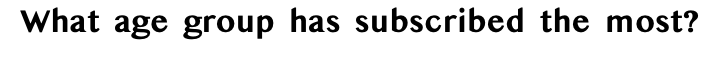

In [32]:
def myplot(colname):

    df_plot = df_bank.groupby(['subscribed', colname]).size().reset_index().pivot(columns='subscribed', index=colname, values=0)
    df_plot['total'] = df_plot.sum(axis=1)
#     df_plot['no'] = df_plot['no']*100/df_plot['total']
#     df_plot['yes'] = df_plot['yes']*100/df_plot['total']
    df_plot.drop('total',axis=1,inplace=True)
#     df_plot.sort_values('yes',ascending=False,inplace=True)

#     fig.set_size_inches(20, 8)


    df_plot.plot(kind='bar', stacked=True, figsize=(30,12))


    plt.xlabel(colname, fontsize=32)
    plt.ylabel('Count', fontsize=32)
    plt.xticks(rotation = 90,fontsize=26)
    plt.yticks(rotation = 0,fontsize=24)
    plt.grid(True, color = "white", linewidth = "1.4", linestyle = "-")
    plt.legend(loc=2, prop={'size': 22})

    #ax.set_title('Age Count Distribution', fontsize=28)

    sns.despine()

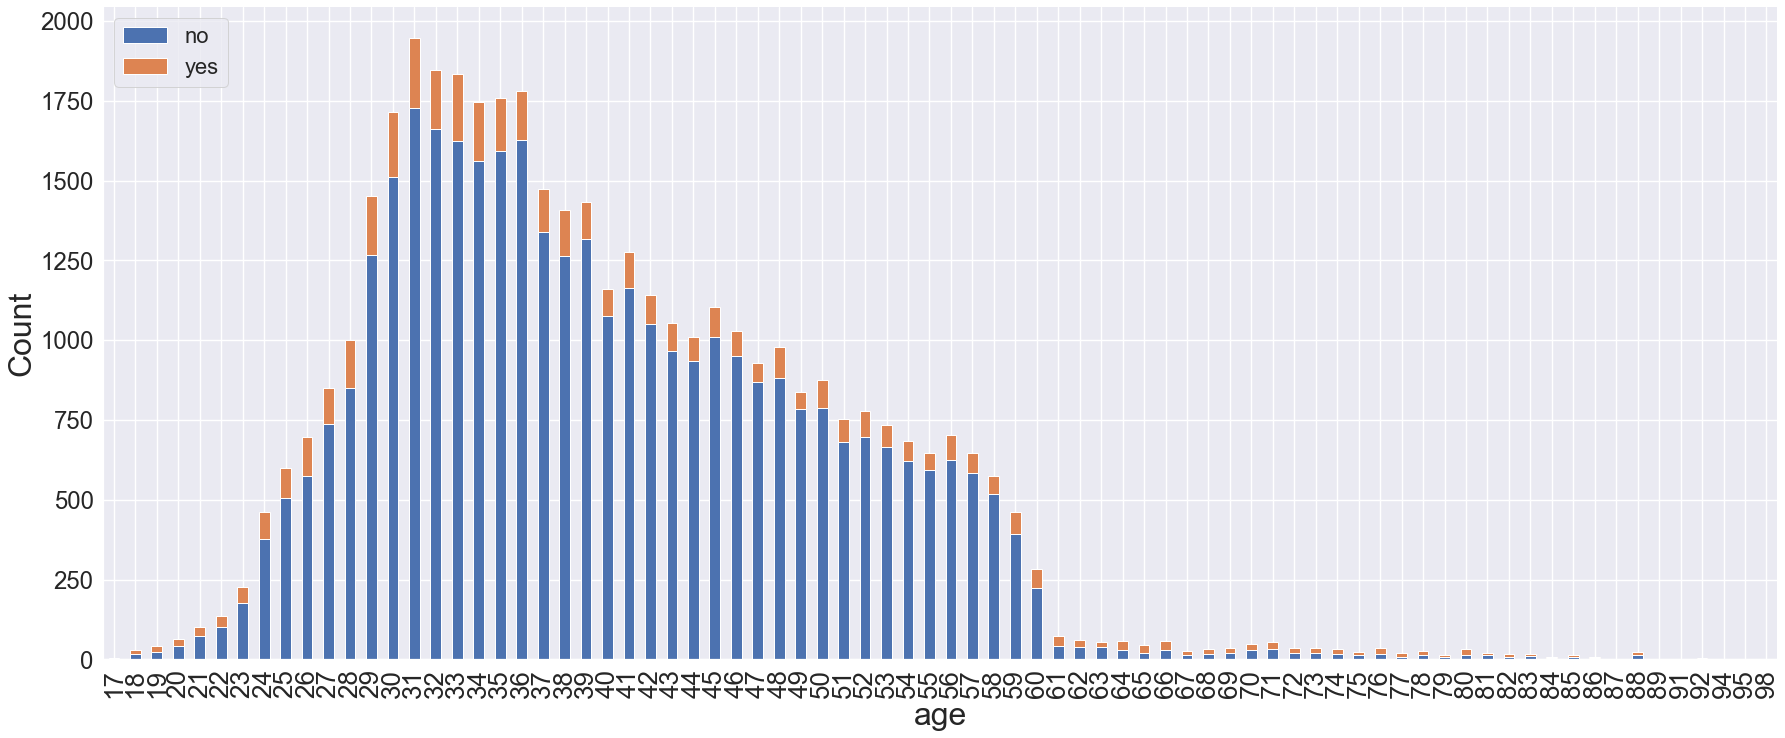

In [33]:
myplot('age')

In [34]:
## Add the comment on above

In [35]:
# Here are the  bins  based on the values observed above. 
# 5 values will result in 4 bins

bins = [17, 25, 35, 45, 61, 98]

#We'll pd.cut method to separate data into bins.
df_bank['bins_age'] = pd.cut(df_bank['age'], bins)

# I will use .cat.as_unordered() method transforming the data to 
# ordered categories.
# bins_age_built = bins_yr_built.cat.as_unordered()
# bins_yr_built.head()

In [36]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,subscribed,bins_age
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,no,"(45, 61]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,no,"(45, 61]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,no,"(35, 45]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,no,"(35, 45]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,no,"(45, 61]"


In [37]:
df_bank_copy = df_bank.copy()

In [38]:
df_bank = df_bank.assign(age_group=pd.cut(df_bank['age'], bins=[17, 25, 35, 45, 61, 98], 
                             right=False, labels = ['students','young_professionals', 
                                            'young_adults','empty_nesters','seniors']))

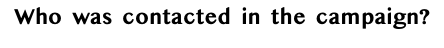

In [39]:
def countplot(colname):
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    sns.countplot(x = colname, data = df_bank, order = df_bank[colname].value_counts().index, palette = "coolwarm_r")
    ax.set_xlabel(colname, fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    plt.xticks(rotation = 50,fontsize=16)
    plt.yticks(rotation = 0,fontsize=16)
    ax.set_title('Distribution', fontsize=16)
    ax.tick_params(labelsize=14)
    sns.despine()

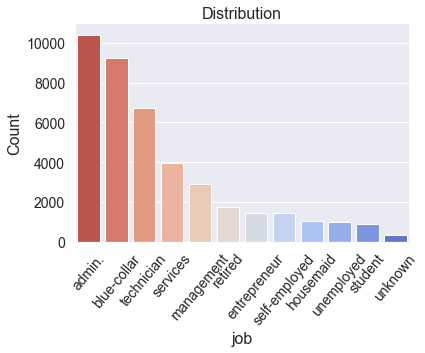

In [40]:
countplot('job')

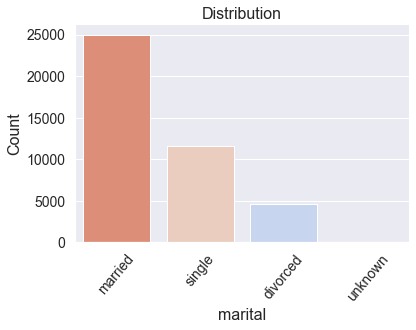

In [41]:
countplot('marital')

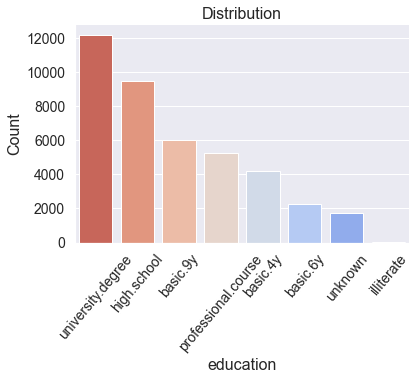

In [42]:
countplot('education')

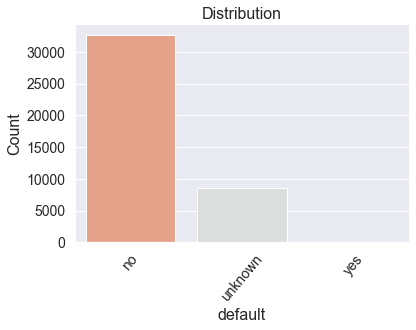

In [43]:
countplot('default')

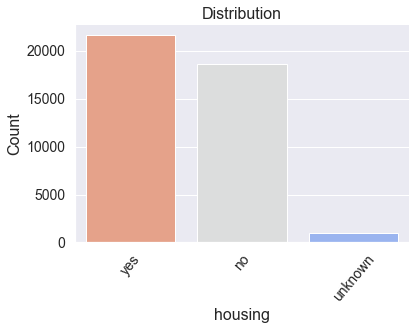

In [44]:
countplot('housing')

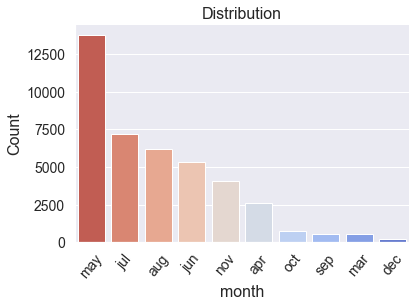

In [45]:
countplot('month')

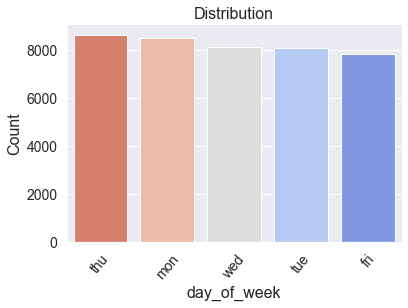

In [46]:
countplot('day_of_week')

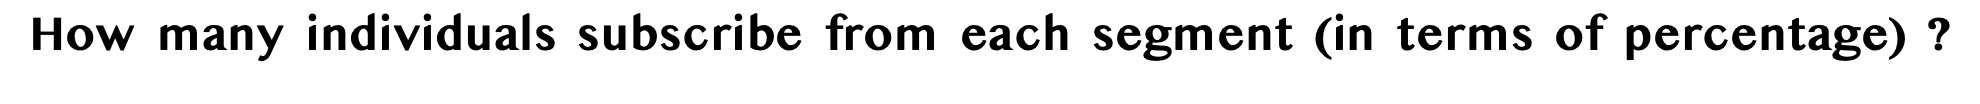

In [47]:
def statPlot(colname):
    
    ############# crarte df ################
    df = df_bank[[colname,'subscribed']]

    df  = df.groupby([colname, 
                              'subscribed']).size().reset_index().pivot(columns='subscribed', index=colname, values=0)


    df['percentage_of_subscribers']= df['yes']*100/(df['no']+ df['yes'])
    # df_job['percentage_of_unsubscribers']= df_job['no']/(df_job['no']+ df_job['yes'])
    df.dropna(inplace=True)
    df= df.sort_values('percentage_of_subscribers').reset_index()
    df[colname] = df[colname].astype('str')
    
    ##### PLOT ####################
    plt.figure(figsize=(15,5))
    ax = sns.barplot(df[colname],df['percentage_of_subscribers'],palette="vlag")
    for bars in ax.containers:
        ax.bar_label(bars, fmt="%.2f%%")
    plt.xticks(rotation = 50)
    plt.show()

In [48]:
 list(df_bank)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'subscribed',
 'bins_age',
 'age_group']

In [49]:
imp_col= ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
'age_group']

In [50]:
# for col in imp_col:
#     statPlot(col)

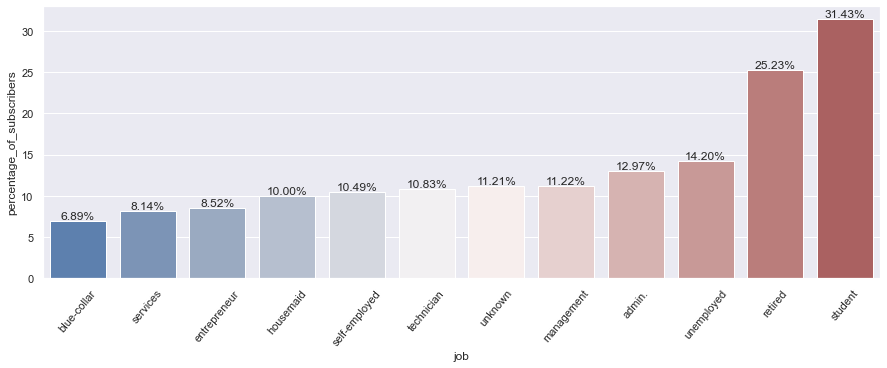

In [51]:
statPlot('job')

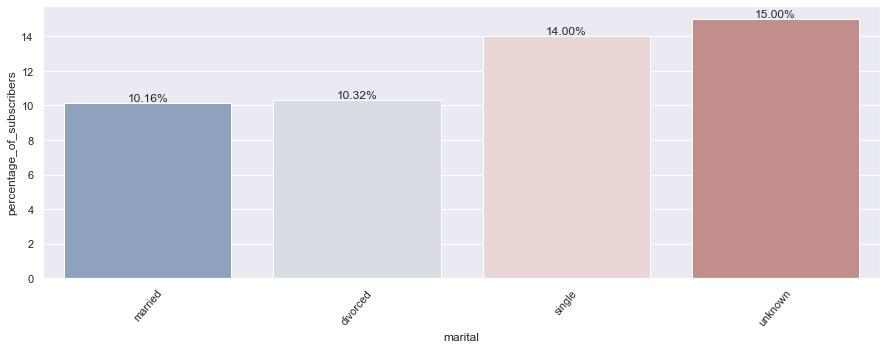

In [52]:
statPlot('marital')

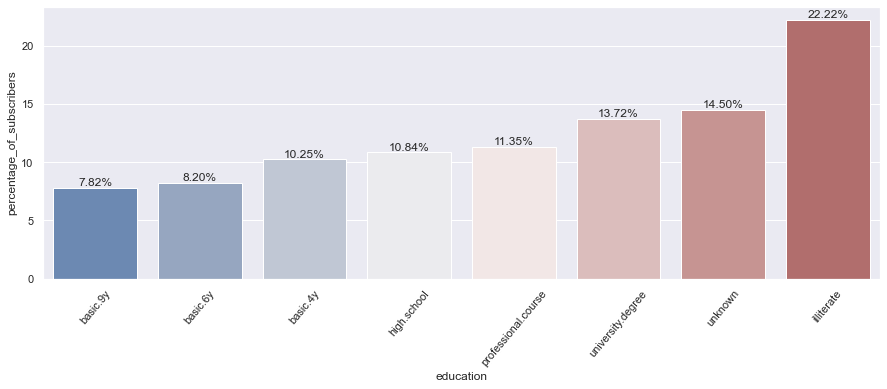

In [53]:
statPlot('education')

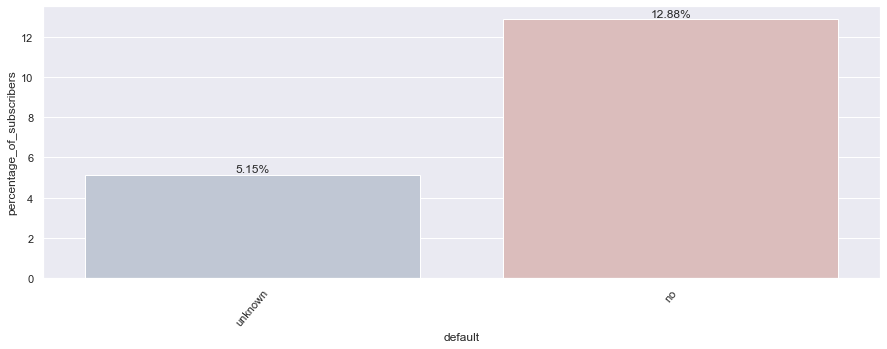

In [54]:
statPlot('default')

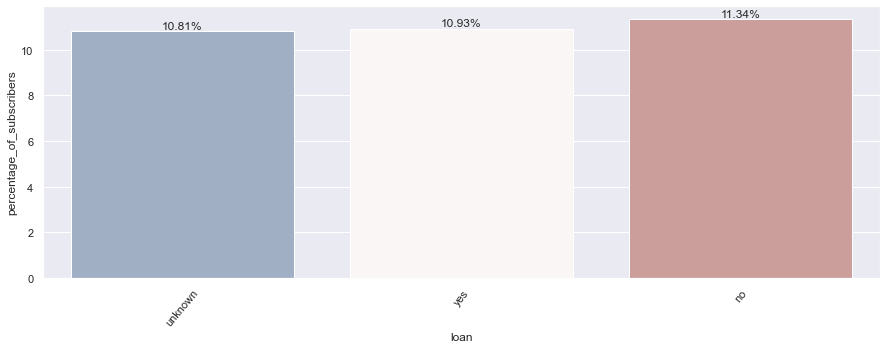

In [55]:
statPlot('loan')

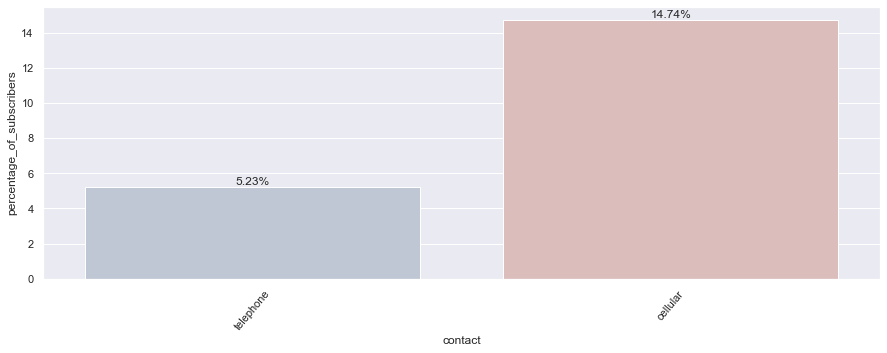

In [56]:
statPlot('contact')

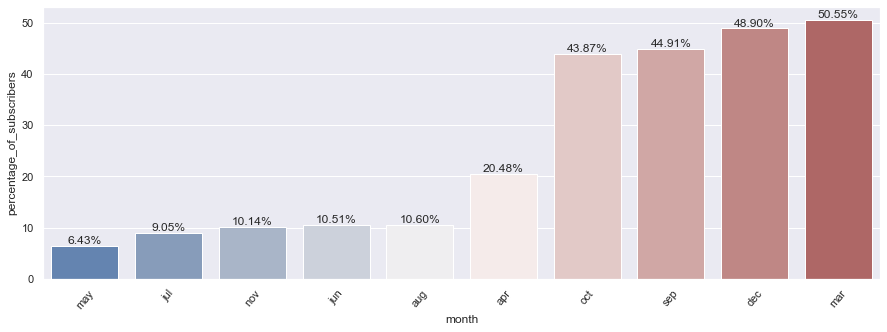

In [57]:
statPlot('month')

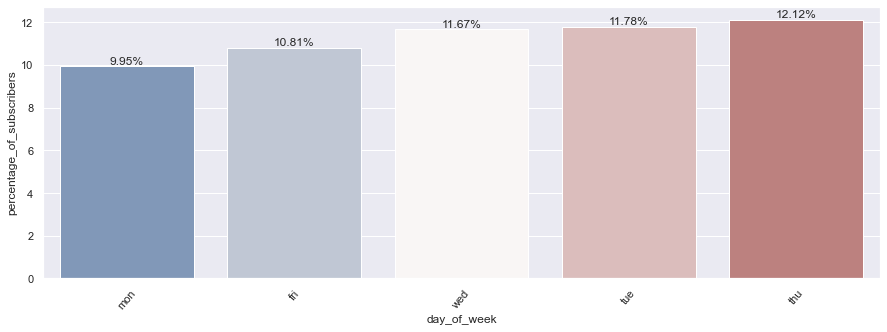

In [58]:
statPlot('day_of_week')

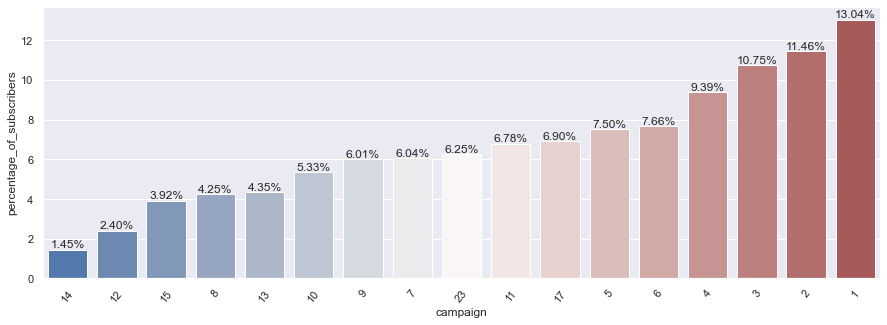

In [59]:
statPlot('campaign')

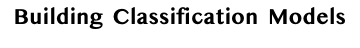

In [60]:
# Dropping ‘duration' from the dataframe

df_bank.drop(['duration','bins_age'],axis=1,inplace=True)

In [61]:
# Changing Yes to 1 and No to 0

dic_sub = {'yes':1,'no':0}

df_bank['subscribed'] = df_bank['subscribed'].map(dic_sub)

df_bank['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: subscribed, Length: 41188, dtype: int64

In [62]:
# Split df into X and y
X = df_bank.drop("subscribed", axis=1)
y = df_bank["subscribed"]

In [63]:
X.select_dtypes('object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [131]:
# def Train_Test_Scores(model):
    
    
#     # Fit the model 

#     model.fit(X_train,y_train)
#     y_preds = model.predict(X_test)
    
   
    
#     train_acc = model.score(X_train,y_train)
#     test_acc = model.score(X_test,y_test)
    
#     print('Training_Accuracy:',  train_acc)
#     print('Test_Accuracy:', test_acc)
    
#     print('Recall:', precision_score(y_test,y_preds))
#     print('Precision:', f1_score(y_test,y_preds))
#     plot_confusion_matrix(model, X_test, y_test, cmap="Blues")
#     return train_acc,test_acc

In [65]:
df_bank['age_group'] = df_bank['age_group'].astype('str')

In [66]:
X.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
age_group         2
dtype: int64

In [67]:
df_bank = df_bank.dropna(axis=0, subset=['age_group'])

In [68]:
df_bank = df_bank.dropna(axis=0, subset=['age_group'])

In [69]:
df_bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
subscribed        0
age_group         0
dtype: int64

Scaling
We are scaling the data using the Standard Scaler method. Standardize the data by making the mean of the distribution zero and the majority of the data will be between -1 and 1.

In [70]:
# titles_options = [("Confusion matrix for" modle, None),
#                   ("Normalized confusion matrix", 'true')]
# for title, normalize in titles_options:
#     disp = plot_confusion_matrix(dtree, X_test_ss, y_test,
#                                  display_labels=[0, 1, 2],
#                                  cmap=plt.cm.Blues,
#                                  normalize=normalize)
#     disp.ax_.set_title(title)

#     print(title)
#     print(disp.confusion_matrix)

# plt.show()

### Pipeline

In [143]:
def Train_Test_Scores(model,display=False):
    
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)
    
    if display:
        print('Training_Accuracy:',  train_acc)
        print('Test_Accuracy:', test_acc)

        print('Precision:', precision)
        print('Recall:', recall) 
        print('F1_Score:', f1)
          
        plot_confusion_matrix(model, X_test, y_test, cmap="Blues")
          
          
    return train_acc,test_acc,precision,recall,f1

In [73]:
df_bank['age_group'] = df_bank['age_group'].astype('str')

In [74]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,empty_nesters
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,empty_nesters
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,young_adults
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,young_adults
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,empty_nesters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,seniors
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,empty_nesters
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,empty_nesters
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,young_adults


In [96]:
# [indx for indx,dp in enumerate(X.dtypes) if dp=='O']

In [97]:
# for indx,dp in enumerate(X.dtypes):
#     if dp=='O':
#         print(list(X)[indx],indx)

In [75]:
# Split df into X and y
X = df_bank.drop("subscribed", axis=1)
y = df_bank["subscribed"]
cat_indx = [indx for indx,tp in enumerate(X.dtypes) if tp=='O']

cat_col = list(X.select_dtypes('object'))
num_col = list(set(X) - set(cat_col))

from imblearn.over_sampling import SMOTENC
smt = SMOTENC(categorical_features=cat_indx, random_state=2)
X_smote, y_smote = smt.fit_resample(X, y)

In [98]:
y_smote.value_counts()

0    36548
1    36548
Name: subscribed, dtype: int64

In [ ]:
# num_pipeline = Pipeline([('scaler', StandardScaler())])

# num_attribs = num_col
# cat_attribs = cat_col

# preprocessor = ColumnTransformer([
#         ("num", num_pipeline, num_attribs),
#         ("cat", OneHotEncoder(), cat_attribs),
#     ])

# dt = Pipeline(steps=[("preprocessor", preprocessor), ('DT', DecisionTreeClassifier())])
# # lr = Pipeline(steps=[("preprocessor", preprocessor), ('DT', LogisticRegression())])

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 42)

In [218]:
def custom_pipeline(clf):
#     num_pipeline = Pipeline([('scaler', StandardScaler())])
    num_attribs = num_col
    cat_attribs = cat_col

    preprocessor = ColumnTransformer([
            ("num", StandardScaler(), num_attribs),
            ("cat", OneHotEncoder(), cat_attribs),
        ])

    model = Pipeline(steps=[("preprocessor", preprocessor), ('model', clf)])
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    X_probs = model.predict_proba(X_test)
    train_acc,test_acc,precision,recall,f1 = Train_Test_Scores(model)
   
    print("")
    return train_acc,test_acc,precision,recall,f1,y_pred,X_probs,model

### Logistic Regression Model

In [216]:
val = custom_pipeline(LogisticRegression())

In [217]:
val[-1]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cons_price_idx', 'previous',
                                                   'emp_var_rate', 'campaign',
                                                   'cons_conf_idx', 'age',
                                                   'pdays']),
                                                 ('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome',
                                                   'age_group'])])),
                ('model', LogisticRegression())])

In [151]:
print(classification_report(y_test,val[-1]))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      7341
           1       0.79      0.73      0.76      7279

    accuracy                           0.77     14620
   macro avg       0.77      0.77      0.77     14620
weighted avg       0.77      0.77      0.77     14620



In [182]:
val[-1]

array([[0.29416181, 0.70583819],
       [0.94616988, 0.05383012],
       [0.00919066, 0.99080934],
       ...,
       [0.69297876, 0.30702124],
       [0.4464683 , 0.5535317 ],
       [0.60386813, 0.39613187]])

In [183]:
val[-2]

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

### Decision Tree Model

Training_Accuracy: 0.990372118475956
Test_Accuracy: 0.8673734610123119
Precision: 0.8479280688037529
Recall: 0.8939414754774008
F1_Score: 0.8703270246773223



(0.990372118475956, 0.8673734610123119)

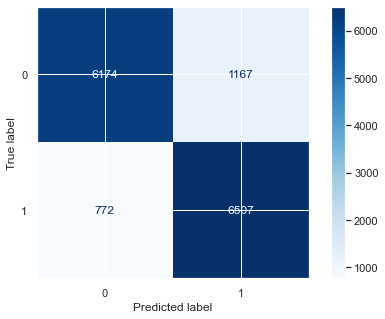

In [117]:
custom_pipeline(DecisionTreeClassifier())

### XG Boost Model

In [ ]:
custom_pipeline(XGBClassifier(n_jobs=-1))

### Random Forest Model

In [ ]:
custom_pipeline(RandomForestClassifier())

In [ ]:
custom_pipeline(KNeighborsClassifier())

# function-pipeline

### Evaluating Models

I calculate the scores for the the following model: Logistic Regression, Decision Tree and XGboost and their respective tuned classifiers. The code will loop through the models and generate data-frame to compare them again each other. We omitted kNN given the low Recall score.

In [ ]:
# all_models = [dummy,lr,dt,dt_h_tuning,XGboost_model,grid_clf]


In [ ]:
# df_bank.info()

In [ ]:
# pipeline_class_report():
#     num_pipeline = Pipeline([('scaler', StandardScaler())])
#     num_attribs = num_col
#     cat_attribs = cat_col

#     preprocessor = ColumnTransformer([
#             ("num", num_pipeline, num_attribs),
#             ("cat", OneHotEncoder(), cat_attribs),
#         ])

#     model = Pipeline(steps=[("preprocessor", preprocessor), ('model', clf)])
#     model.fit(X_train,y_train)
    
#     y_pred = model.predict(X_test)
    
#     list_models = [LogisticRegression(),DecisionTreeClassifier(),
#                RandomForestClassifier(n_jobs=-1),XGBClassifier(n_jobs=-1)]

#     model_names = 'Lositic_Regression  Decision_Tree Random_Forest XGboost'.split()
    
#     for (model,model_names) in zip(list_models, model_names):
    
    
            
#     print(model_names)
    
#             model.fit(X_train, y_train)
    
#             y_preds = model.predict(X_test)
    
#             report = classification_report(y_test, y_preds)
        
#             print(report)


In [203]:
models_DataFrame = pd.DataFrame(columns=['Model','Train_Accuracy','Test_Accuracy',
                                         'Precision','Recall','F1_score'])
list_models = [LogisticRegression(),DecisionTreeClassifier(),
              RandomForestClassifier(n_jobs=-1),XGBClassifier(n_jobs=-1)]

model_names = 'Lositic_Regression  Decision_Tree Random_Forest XGboost'.split()

from tqdm import tqdm
x_probs  = []
pipe_models = []

for model,model_name in tqdm(zip(list_models,model_names)):
    train_acc,test_acc,precision,recall,f1,_,x_prob,pipe_model = custom_pipeline(model)  
    x_probs.append(x_prob[:,1])
    pipe_models.append(pipe_model)
    models_DataFrame.loc[len(models_DataFrame)] = [model_name,train_acc,test_acc,precision,recall,f1]
    
# models_DataFrame  = models_DataFrame.append({'Model':model_names,
#                                              'Train_Accuracy':train_acc,
#                                              'Test_Accuracy':test_acc,
#                                              'Precision':precision_score,
#                                              'Recall': recall_score,
#                                              'F1_Score': f1_score},
#                                               ignore_index = True)
    

1it [00:02,  2.59s/it]

2it [00:15,  8.42s/it]

3it [01:19, 34.18s/it]

4it [01:27, 21.85s/it]

In [205]:
models_DataFrame

,Model,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_score
0,Lositic_Regression,0.771650,0.771956,0.792699,0.733892,0.762163
1,Decision_Tree,0.990372,0.869494,0.850450,0.895315,0.872306
2,Random_Forest,0.990321,0.908413,0.902548,0.914823,0.908644
3,XGboost,0.877488,0.853352,0.863720,0.837615,0.850467


Comparing Models
I compare the scores below for all the models. My main focus will be to look into Recall because we will not want to miss a false negative. If the costumer did not subscribe and it is important to note. 

XGboost has showed to have the highest Ave Cross validation score. We will dig into the feature importance to get further details.

# PIPELINE

In [220]:
# grid_clf = GridSearchCV(pipe_models[2], params, scoring='accuracy', cv=3, n_jobs=-1,verbose=1)

In [219]:
1 # plot roc-auc, before and after
2 # select columns using feature importance, then train the model on those columns and check the result = 2 model

******************************************************************************************

### Plotting the results

In [170]:
x_plot = models_DataFrame["Model"]
y_plot = models_DataFrame["Test_Accuracy"]

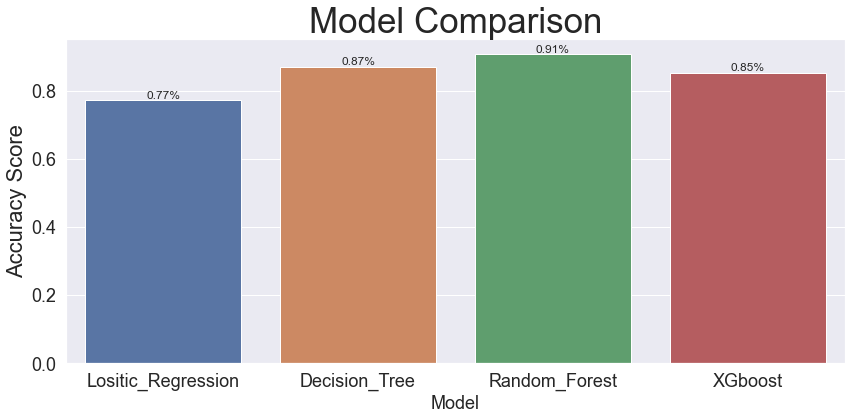

In [171]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=x_plot, y=y_plot)

# Lable and define fontsize for main and axis titles.

plt.xlabel('Model', fontsize=18)
plt.ylabel('Accuracy Score', fontsize=22)
plt.title('Model Comparison', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=18)

for bars in ax.containers:
        ax.bar_label(bars, fmt="%.2f%%")
#Set x-axis tick labels.


plt.tight_layout()
plt.show()

In [ ]:
###Receiver Operating Characteristic ("ROC")


In [ ]:
# Generate a no skill prediction (majority class)
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

ns_probs = [0 for _ in range(len(y_test))]

#for XG Boost

XGboost_model= XGBClassifier()

XGboost_model.fit(X_train_scaled, y_train)


# predict probabilities
XG_probs = XGboost_model.predict_proba(X_test_scaled)


# keep probabilities for the positive outcome only
XG_probs = XG_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
XG_auc = roc_auc_score(y_test, XG_probs)


# summarize scores


print('XGBoost:  AUC=%.3f' % (XG_auc))



# calculate roc curves
XG_fpr, XG_tpr, _ = roc_curve(y_test, XG_probs)


# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(XG_fpr, XG_tpr, color='darkorange',
         lw=lw, label='ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')

In [ ]:
Precision-Recall Curve ("PRC")

In [178]:
m = RandomForestClassifier()

We also show the precision-recall curve as it is more appropriate for imbalanced data that we are dealing with. We can see in the graph the trade-off among the true positive and the predictive positive value for our XGboost model using various probability thresholds. As we mentioned above, we are more focused on having a higher recall without giving up too much on precision. Roughly around 90%, precision is a little north of 80% and this is a feasible trade-off for our model.

In [187]:
y_test

46673    1
10186    0
71199    1
48227    1
47094    1
        ..
12934    0
29567    0
13001    0
66787    1
8236     0
Name: subscribed, Length: 14620, dtype: int64

In [189]:
precision_recall_curve(y_test, val[-1][:, 1])

(array([0.49787962, 0.49791367, 0.49794774, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.74763017e-04, 1.37381508e-04, 0.00000000e+00]),
 array([9.50077696e-05, 1.00356413e-03, 1.78842815e-03, ...,
        9.97308642e-01, 9.97546905e-01, 9.97679529e-01]))

In [191]:
t = val[-1]

In [197]:
t.shape

(14620, 2)

In [200]:
t[:,0]

array([0.29416181, 0.94616988, 0.00919066, ..., 0.69297876, 0.4464683 ,
       0.60386813])

In [206]:
x_probs[2]

array([0.99      , 0.04      , 1.        , ..., 0.53714286, 0.54266667,
       0.1       ])

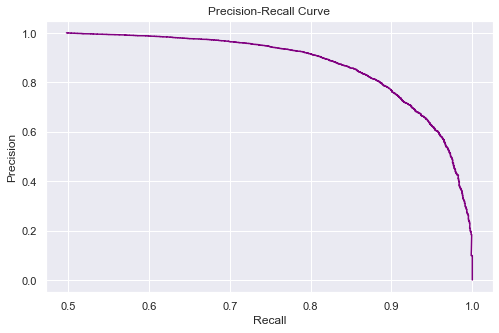

In [210]:
precision, recall, thresholds = precision_recall_curve(y_test, x_probs[3])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(precision,recall, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()


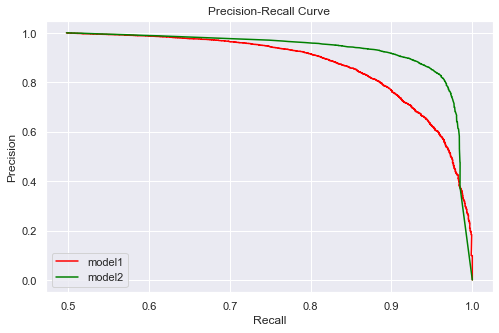

In [213]:
precision, recall, thresholds = precision_recall_curve(y_test, x_probs[3]) # model1
precision1, recall1, thresholds1 = precision_recall_curve(y_test, x_probs[2]) # model2

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(precision,recall, color='red',label='model1')
ax.plot(precision1,recall1, color='green',label='model2')
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

ax.legend()
#display plot
plt.show()


### Permutation of Importance

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(XGboost, X_test, y_test)

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(12,20))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,26))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_scaled.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [ ]:
plot_feature_importances(XGboost_model)

In [ ]:
model_1 = XGboost_model

(pd.Series(model_1.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh',color='g'))    
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('TOP 4 Feature of Importance',fontsize=15)
fig.savefig('TOP_4.jpg')

In [ ]:
plot_confusion_matrix(XGboost_model, X_test_scaled, y_test, cmap="Blues")

In [ ]:
#for presentaion 

In [ ]:
group_names = [‘True Neg’,’False Pos’,’False Neg’,’True Pos’]
group_counts = [“{0:0.0f}”.format(value) for value in
                cf_matrix.flatten()]
group_percentages = [“{0:.2%}”.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f”{v1}\n{v2}\n{v3}” for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt=‘’, cmap='Blues')
